In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np
import random
import matplotlib.image as mpimg
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
import image

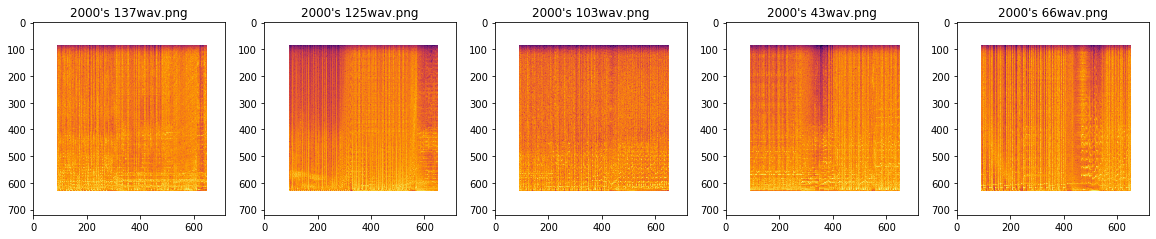

In [2]:
plt.figure(figsize=(20,20))
test_folder=r'C:\Users\varadraj y\Desktop\dsp_data\data_train\filtered10s'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [3]:
IMG_WIDTH=720
IMG_HEIGHT=720
img_folder=r'C:\Users\varadraj y\Desktop\dsp_data\data_train'


In [4]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r'C:\Users\varadraj y\Desktop\dsp_data\data_train')

In [5]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

In [6]:
model=tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
            tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(100, activation='relu'),
            tf.keras.layers.Dense(5, activation='softmax')
        ])
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(x=np.array(img_data, np.float32), y=np.array(list(map(int,target_val)), np.float32), epochs=20)

Epoch 1/20
23/23 [==============================] - 145s 6s/step - loss: 198.4587 - accuracy: 0.2357
Epoch 2/20
23/23 [==============================] - 130s 6s/step - loss: 1.4006 - accuracy: 0.5157
Epoch 3/20
23/23 [==============================] - 123s 5s/step - loss: 2.4795 - accuracy: 0.4610
Epoch 4/20
23/23 [==============================] - 121s 5s/step - loss: 2.8112 - accuracy: 0.4627
Epoch 5/20
23/23 [==============================] - 136s 6s/step - loss: 3.6506 - accuracy: 0.6025
Epoch 6/20
23/23 [==============================] - 138s 6s/step - loss: 2.3792 - accuracy: 0.6306
Epoch 7/20
23/23 [==============================] - 130s 6s/step - loss: 2.1214 - accuracy: 0.6151
Epoch 8/20
23/23 [==============================] - 129s 6s/step - loss: 2.6526 - accuracy: 0.5538
Epoch 9/20
23/23 [==============================] - 126s 5s/step - loss: 1.7901 - accuracy: 0.6192
Epoch 10/20
23/23 [==============================] - 120s 5s/step - loss: 1.0755 - accuracy: 0.6692
Epoch 1

In [9]:
model.save(r'C:\Users\varadraj y\Desktop\dsp_data\saved_model')

INFO:tensorflow:Assets written to: C:\Users\varadraj y\Desktop\dsp_data\saved_model\assets


In [10]:
from tensorflow import keras
model = keras.models.load_model(r'C:\Users\varadraj y\Desktop\dsp_data\saved_model')

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 359, 359, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 179, 179, 64)      18496     
_________________________________________________________________
flatten (Flatten)            (None, 2050624)           0         
_________________________________________________________________
dense (Dense)                (None, 100)               205062500 
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 205,082,397
Trainable params: 205,082,397
Non-trainable params: 0
_________________________________________________________________


In [12]:
history.history

{'loss': [82.825927734375,
  1.7840259075164795,
  2.2677810192108154,
  3.6072938442230225,
  6.583669662475586,
  3.171936273574829,
  2.9106462001800537,
  1.7720427513122559,
  2.9524314403533936,
  1.1007802486419678,
  2.19199538230896,
  2.5358283519744873,
  0.6218318343162537,
  1.6142449378967285,
  0.4743397533893585,
  4.012215614318848,
  0.24972476065158844,
  1.0499992370605469,
  0.27961087226867676,
  3.8771188259124756],
 'accuracy': [0.2609890103340149,
  0.49038460850715637,
  0.4958791136741638,
  0.424450546503067,
  0.4848901033401489,
  0.5370879173278809,
  0.5604395866394043,
  0.6483516693115234,
  0.5425823926925659,
  0.6840659379959106,
  0.6332417726516724,
  0.6263736486434937,
  0.8008241653442383,
  0.7527472376823425,
  0.8214285969734192,
  0.708791196346283,
  0.9189560413360596,
  0.8379120826721191,
  0.9203296899795532,
  0.8104395866394043]}

In [13]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r'C:\Users\varadraj y\Desktop\dsp_data_2')

In [14]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

In [15]:
model.evaluate(x=np.array(img_data, np.float32), y=np.array(list(map(int,target_val)), np.float32))

4/4 [==============================] - 3s 479ms/step - loss: 0.1709 - accuracy: 0.9592


[0.17093002796173096, 0.9591836929321289]

In [41]:
image= cv2.imread(r"C:\Users\varadraj y\Desktop\test\1970's _testwav.png", cv2.COLOR_BGR2RGB)
image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
image=np.array(image)
image = image.astype('float32')
image /= 255


model.predict(x=image)

In [71]:
model.predict(image)

array([[1.8415454e-05, 9.3731590e-02, 8.9721918e-01, 5.1268400e-03,
        3.9039133e-03]], dtype=float32)

In [70]:
image = image.reshape([1,image.shape[0] ] + list(image.shape[1:])) 